# **1. Importing the libraries**

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **2. Read the Excel file**

In [3]:
# Load the dataset
df = pd.read_excel('/content/Alzheimers Disease Diagnosis Prediction (1).xlsx')
df.head()

,PatientID,Age,Gender,Ethnicity,Education,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,Male,Caucasian,Bachelors,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,No
1,4752,89,Male,Caucasian,NaN,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,No
2,4753,73,Male,Other,High School,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,No
3,4754,74,Female,Caucasian,High School,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,No
4,4755,89,Male,Caucasian,NaN,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,No


In [4]:
df.tail()

,PatientID,Age,Gender,Ethnicity,Education,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
1994,6745,86,Female,Caucasian,Higher,33.231027,0,15.141932,3.107248,2.868337,...,3.458476,0,0,0.683187,1,0,0,0,0,Yes
1995,6746,67,Female,Asian,NaN,22.310463,0,16.552334,3.459810,3.218011,...,4.094189,1,0,3.380868,0,1,0,1,0,No
1996,6747,61,Male,Caucasian,Bachelors,24.565357,1,2.273373,9.976581,2.057188,...,9.601238,1,0,8.818932,0,1,0,0,0,Yes
1997,6748,71,Male,Caucasian,Higher,23.087421,1,1.894308,3.438004,0.435110,...,5.491988,0,0,0.211355,0,0,0,0,0,No
1998,6749,63,Female,Other,NaN,32.332153,0,18.133869,9.504678,0.916159,...,6.498224,0,0,1.089879,0,0,0,0,0,No


In [63]:
# Load the dataset
predict_df = pd.read_excel('/content/Alzheimers Disease Diagnosis Prediction (1).xlsx',sheet_name="Predict")
predict_df.head()

,PatientID,Age,Gender,Ethnicity,Education,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,6750,83,Female,African American,Bachelors,39.774146,1,11.980350,9.319172,4.642762,...,8.712875,1,0,9.289087,0,0,0,0,1,Predict
1,6751,90,Male,Asian,High School,22.161590,0,11.494339,8.305149,2.303003,...,7.582191,0,0,3.307932,0,1,0,0,1,Predict
2,6752,65,Male,African American,High School,30.588889,1,14.005588,0.182555,7.580054,...,6.652212,0,1,5.148285,0,0,0,0,1,Predict
3,6753,64,Male,African American,Higher,21.933938,0,8.382884,3.309847,9.468895,...,1.863505,0,0,8.545683,0,0,0,1,0,Predict
4,6754,73,Male,Caucasian,NaN,19.810324,0,8.936258,8.767912,0.360870,...,1.013689,0,1,5.021113,1,0,0,0,0,Predict


In [64]:
predict_df.tail()

,PatientID,Age,Gender,Ethnicity,Education,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
145,6895,61,Male,Caucasian,High School,39.121757,0,1.561126,4.049964,6.555306,...,0.238667,0,0,4.492838,1,0,0,0,0,Predict
146,6896,75,Male,Caucasian,Bachelors,17.857903,0,18.767261,1.360667,2.904662,...,8.687480,0,1,9.204952,0,0,0,0,0,Predict
147,6897,77,Male,Caucasian,High School,15.476479,0,4.594670,9.886002,8.120025,...,1.972137,0,0,5.036334,0,0,0,0,0,Predict
148,6898,78,Female,Other,High School,15.299911,0,8.674505,6.354282,1.263427,...,5.173891,0,0,3.785399,0,0,0,0,1,Predict
149,6899,72,Male,Caucasian,Bachelors,33.289738,0,7.890703,6.570993,7.941404,...,6.307543,0,1,8.327563,0,1,0,0,1,Predict


# **2. Data Analysis**

In [7]:
df.shape

(1999, 34)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  1999 non-null   int64  
 1   Age                        1999 non-null   int64  
 2   Gender                     1999 non-null   object 
 3   Ethnicity                  1999 non-null   object 
 4   Education                  1582 non-null   object 
 5   BMI                        1999 non-null   float64
 6   Smoking                    1999 non-null   int64  
 7   AlcoholConsumption         1999 non-null   float64
 8   PhysicalActivity           1999 non-null   float64
 9   DietQuality                1999 non-null   float64
 10  SleepQuality               1999 non-null   float64
 11  FamilyHistoryAlzheimers    1999 non-null   int64  
 12  CardiovascularDisease      1999 non-null   int64  
 13  Diabetes                   1999 non-null   int64

In [9]:
df.describe()

,PatientID,Age,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,...,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,5750.000000,75.040520,27.654787,0.292146,10.051089,4.918291,5.003476,7.049383,0.257129,0.143072,...,14.850670,5.052715,0.208604,0.158579,4.961124,0.210605,0.159580,0.149575,0.161081,0.304152
std,577.205914,8.970358,7.190450,0.454863,5.772773,2.853990,2.908328,1.760209,0.437160,0.350233,...,8.558278,2.888519,0.406413,0.365375,2.946585,0.407841,0.366308,0.356743,0.367697,0.460162
min,4751.000000,60.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,0.000000,0.000000,...,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5250.500000,67.000000,21.636154,0.000000,5.082427,2.545998,2.470854,5.499139,0.000000,0.000000,...,7.315675,2.550087,0.000000,0.000000,2.330209,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5750.000000,75.000000,27.805269,0.000000,9.983461,4.766424,5.096252,7.113182,0.000000,0.000000,...,14.587253,5.062750,0.000000,0.000000,5.002073,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6249.500000,83.000000,33.828735,1.000000,15.188059,7.393688,7.561277,8.561870,1.000000,0.000000,...,22.165475,7.496824,0.000000,0.000000,7.558082,0.000000,0.000000,0.000000,0.000000,1.000000
max,6749.000000,90.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999201,1.000000,1.000000,...,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Checking missing values
df.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
Education,417
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


In [11]:
# Check the duplicate value
df[df.duplicated()]

,PatientID,Age,Gender,Ethnicity,Education,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis


# **3. Data Preprocessing and Visualize the dataset**

In [12]:
# Replace 'Yes' with 1 and 'No' with 0
df['Diagnosis'] = df['Diagnosis'].replace({'Yes': 1, 'No': 0})
df['Diagnosis'].value_counts()

,count
Diagnosis,
0,1323
1,676


In [13]:
# Replace 'Male' with 1 and 'Female' with 0
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df['Gender'].value_counts()

,count
Gender,
0,1011
1,988


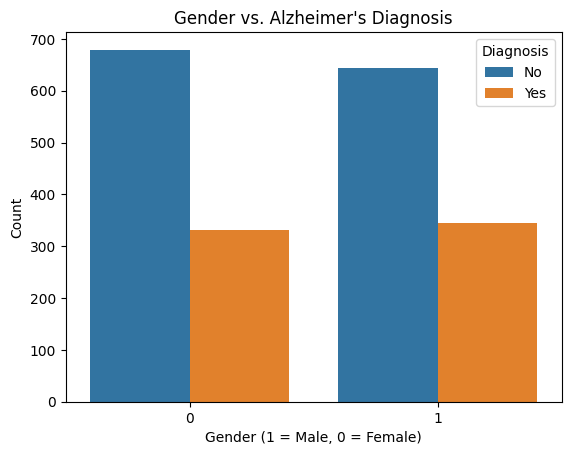

In [14]:
# Plot gender vs. diagnosis using a count plot
sns.countplot(data=df, x='Gender', hue='Diagnosis')

# Set plot labels and title
plt.xlabel('Gender (1 = Male, 0 = Female)')
plt.ylabel('Count')
plt.title('Gender vs. Alzheimer\'s Diagnosis')
plt.legend(title='Diagnosis', labels=['No', 'Yes'])
plt.show()

In [15]:
# Define age bins and labels
bins = [60, 65, 70, 75, 80, 85, 90]
labels = ['60-64', '65-69', '70-74', '75-79', '80-84', '85-90']

# Create a new column for age ranges
df['AgeRange'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [16]:
# Group by age range and diagnosis, then count occurrences
age_diagnosis_counts = df.groupby(['AgeRange', 'Diagnosis']).size().unstack().fillna(0)

# Reset index to make plotting easier
age_diagnosis_counts = age_diagnosis_counts.reset_index()

<ipython-input-16-d5de8180cb0a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_diagnosis_counts = df.groupby(['AgeRange', 'Diagnosis']).size().unstack().fillna(0)


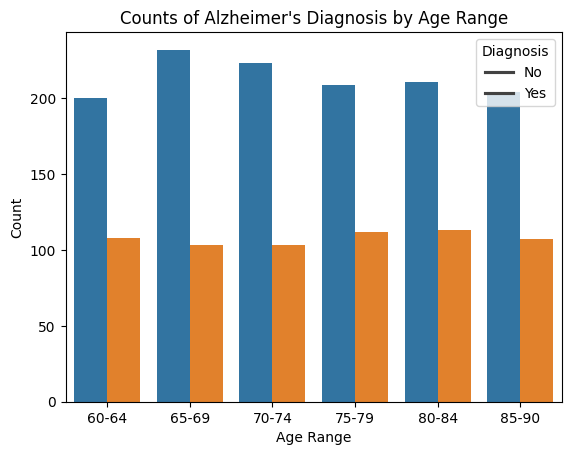

In [17]:
# Melt the DataFrame to have a long format suitable for seaborn
age_diagnosis_counts_melted = age_diagnosis_counts.melt(id_vars='AgeRange', var_name='Diagnosis', value_name='Count')

# Plot using seaborn
sns.barplot(data=age_diagnosis_counts_melted, x='AgeRange', y='Count', hue='Diagnosis')

# Set plot labels and title
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Counts of Alzheimer\'s Diagnosis by Age Range')
plt.legend(title='Diagnosis', labels=['No', 'Yes'])
plt.show()

In [18]:
df['Ethnicity'].value_counts()

,count
Ethnicity,
Caucasian,1195
African American,420
Other,195
Asian,189


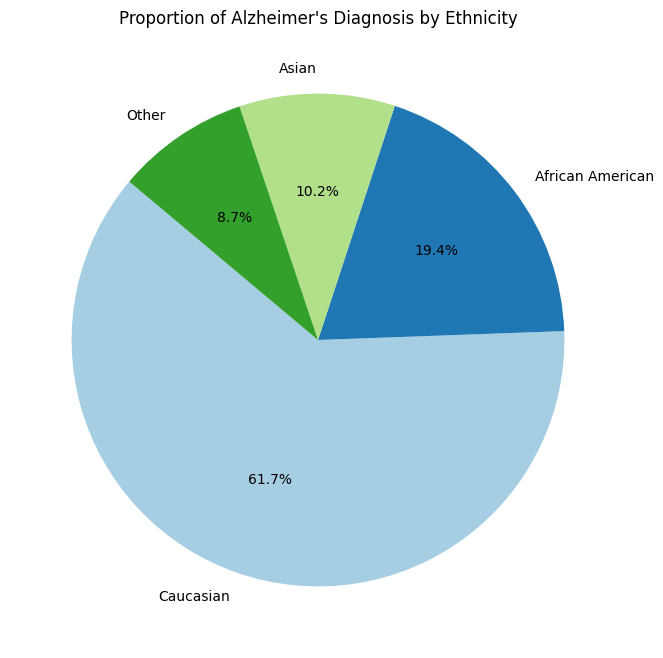

In [19]:
# Filter out only the positive diagnoses (assuming you want to plot only those with diagnosis)
df_diagnosed = df[df['Diagnosis'] == 1]

# Count occurrences of each ethnicity for diagnosed cases
ethnicity_counts = df_diagnosed['Ethnicity'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(ethnicity_counts))))
plt.title('Proportion of Alzheimer\'s Diagnosis by Ethnicity')
plt.show()

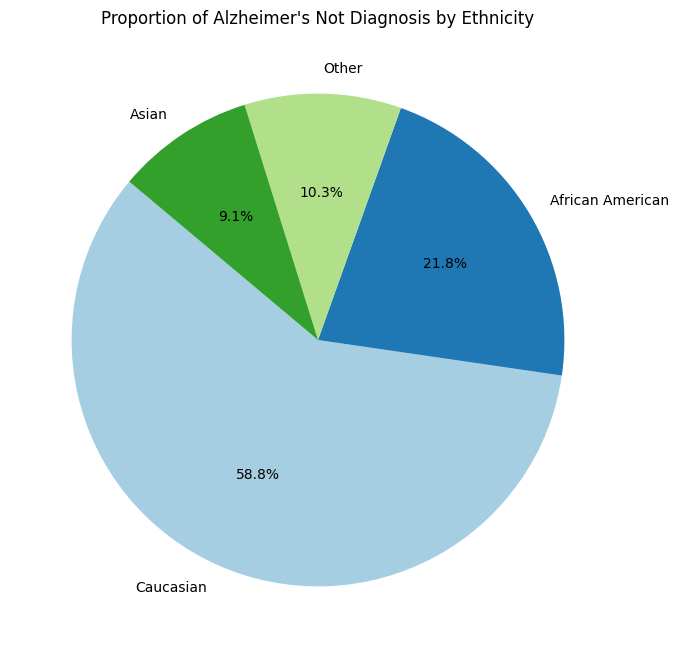

In [20]:
# Filter out only the negative diagnoses
df_notdiagnosed = df[df['Diagnosis'] == 0]

# Count occurrences of each ethnicity for diagnosed cases
ethnicity_counts = df_notdiagnosed['Ethnicity'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(ethnicity_counts))))
plt.title('Proportion of Alzheimer\'s Not Diagnosis by Ethnicity')
plt.show()

Smoking
0    1415
1     584
Name: count, dtype: int64


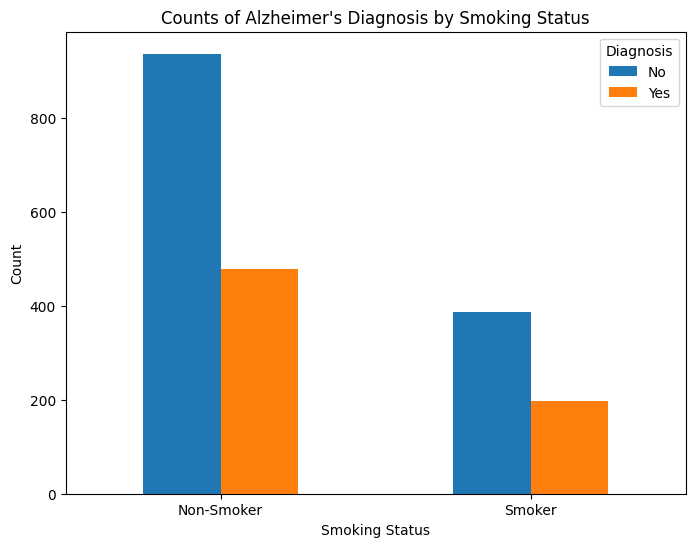

In [21]:
print(df['Smoking'].value_counts())

# Group by smoking status and diagnosis, then count occurrences
smoking_diagnosis_counts = df.groupby(['Smoking', 'Diagnosis']).size().unstack().fillna(0)

# Plotting
smoking_diagnosis_counts.plot(kind='bar', figsize=(8, 6))

# Set plot labels and title
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Counts of Alzheimer\'s Diagnosis by Smoking Status')
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'], rotation=0)
plt.legend(title='Diagnosis', labels=['No', 'Yes'])
plt.show()

FamilyHistoryAlzheimers
0    1485
1     514
Name: count, dtype: int64


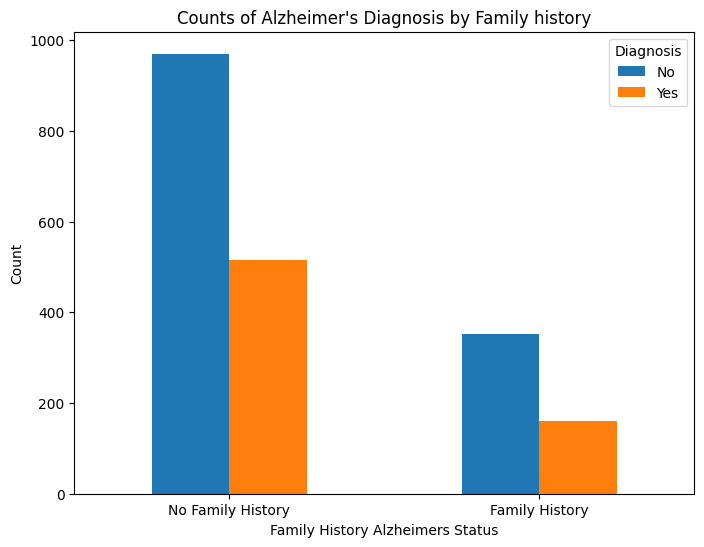

In [22]:
print(df['FamilyHistoryAlzheimers'].value_counts())

# Group by smoking status and diagnosis, then count occurrences
familyhistory_diagnosis_counts = df.groupby(['FamilyHistoryAlzheimers', 'Diagnosis']).size().unstack().fillna(0)

# Plotting
familyhistory_diagnosis_counts.plot(kind='bar', figsize=(8, 6))

# Set plot labels and title
plt.xlabel('Family History Alzheimers Status')
plt.ylabel('Count')
plt.title('Counts of Alzheimer\'s Diagnosis by Family history')
plt.xticks(ticks=[0, 1], labels=['No Family History', 'Family History'], rotation=0)
plt.legend(title='Diagnosis', labels=['No', 'Yes'])
plt.show()

Like that plot all the column w.r.t Diagnosis

In [23]:
df.head()

,PatientID,Age,Gender,Ethnicity,Education,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,AgeRange
0,4751,73,1,Caucasian,Bachelors,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,70-74
1,4752,89,1,Caucasian,NaN,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,85-90
2,4753,73,1,Other,High School,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,70-74
3,4754,74,0,Caucasian,High School,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,70-74
4,4755,89,1,Caucasian,NaN,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,85-90


In [24]:
# Drop the specified columns
df_drop = df.drop(columns=['PatientID', 'Ethnicity', 'Education','AgeRange'])
df_drop.head()

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,1,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,1,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,0,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,1,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,...,6.045039,0,0,0.014691,0,0,1,1,0,0


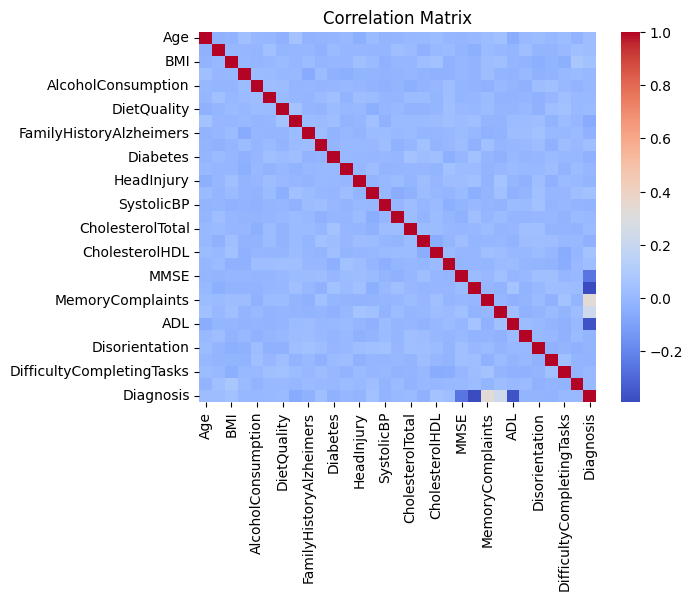

In [25]:
# Correlation matrix
correlation_matrix = df_drop.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()
# The below figure show that all features are independent and not highly correlated so they all are used for prediction

# **4. Train Test Spliting**

In [28]:
# Separate features and target variable
X = df_drop.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [31]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1399, 30) (600, 30) (1399,) (600,)


# **5. Random Forest**

In [33]:
# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
# Make predictions
y_pred = model.predict(X_test)

In [35]:
# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')

Accuracy: 0.9533333333333334
Confusion Matrix:
 [[392   4]
 [ 24 180]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       396
           1       0.98      0.88      0.93       204

    accuracy                           0.95       600
   macro avg       0.96      0.94      0.95       600
weighted avg       0.95      0.95      0.95       600



# **6. Logistic Regression**

In [37]:
# Train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [38]:
# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Model")
print(f'Accuracy: {accuracy_score(y_test, y_pred_logreg)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred_logreg)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_logreg)}')

Logistic Regression Model
Accuracy: 0.85
Confusion Matrix:
 [[357  39]
 [ 51 153]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       396
           1       0.80      0.75      0.77       204

    accuracy                           0.85       600
   macro avg       0.84      0.83      0.83       600
weighted avg       0.85      0.85      0.85       600



# **7. Support Vector Machine**

In [40]:
# Train the SVM model
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [42]:
# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("\nSupport Vector Machine (SVM) Model")
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred_svm)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_svm)}')


Support Vector Machine (SVM) Model
Accuracy: 0.8533333333333334
Confusion Matrix:
 [[357  39]
 [ 49 155]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       396
           1       0.80      0.76      0.78       204

    accuracy                           0.85       600
   macro avg       0.84      0.83      0.83       600
weighted avg       0.85      0.85      0.85       600



# **8. Gradient Boosting**

In [46]:
# Train the Gradient Boosting model
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [47]:
# Make predictions
y_pred_gbc = gbc.predict(X_test)

# Evaluate the model
print("\nGradient Boosting Model")
print(f'Accuracy: {accuracy_score(y_test, y_pred_gbc)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred_gbc)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_gbc)}')


Gradient Boosting Model
Accuracy: 0.9833333333333333
Confusion Matrix:
 [[390   6]
 [  4 200]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       396
           1       0.97      0.98      0.98       204

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



# **9. KNerart Neighbor**

In [44]:
# Train the K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("\nK-Nearest Neighbors (KNN) Model")
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred_knn)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_knn)}')


K-Nearest Neighbors (KNN) Model
Accuracy: 0.5833333333333334
Confusion Matrix:
 [[297  99]
 [151  53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.75      0.70       396
           1       0.35      0.26      0.30       204

    accuracy                           0.58       600
   macro avg       0.51      0.50      0.50       600
weighted avg       0.56      0.58      0.57       600



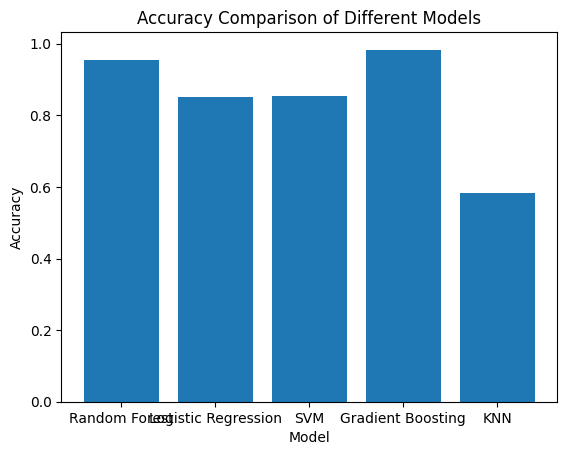

In [49]:
# Store model names and accuracy scores
models = ['Random Forest','Logistic Regression', 'SVM', 'Gradient Boosting', 'KNN']
accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_pred_logreg),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_gbc),
    accuracy_score(y_test, y_pred_knn)
]

# Plotting accuracy comparison
plt.bar(models, accuracies)
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

Apply the higher accuracy model to test (predict) dataset

In [65]:
predict_df['Gender'] = predict_df['Gender'].replace({'Male': 1, 'Female': 0})
# Drop the specified columns
predict_df_drop = predict_df.drop(columns=['PatientID', 'Ethnicity', 'Education','Diagnosis'])
predict_df_drop.head()

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
0,83,0,39.774146,1,11.980350,9.319172,4.642762,6.209636,0,0,...,28.349640,8.712875,1,0,9.289087,0,0,0,0,1
1,90,1,22.161590,0,11.494339,8.305149,2.303003,7.862230,0,0,...,6.050544,7.582191,0,0,3.307932,0,1,0,0,1
2,65,1,30.588889,1,14.005588,0.182555,7.580054,4.312029,0,0,...,23.626510,6.652212,0,1,5.148285,0,0,0,0,1
3,64,1,21.933938,0,8.382884,3.309847,9.468895,6.520243,0,0,...,13.273702,1.863505,0,0,8.545683,0,0,0,1,0
4,73,1,19.810324,0,8.936258,8.767912,0.360870,4.527160,0,0,...,2.318466,1.013689,0,1,5.021113,1,0,0,0,0


In [66]:
# Make predictions
predictions = gbc.predict(predict_df_drop)
print(predictions)

[0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1
 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1
 0 0]


In [69]:
# Replace the 'Diagnosis' column with the predictions
predict_df_drop['Diagnosis'] = predictions
predict_df_drop.head()

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,83,0,39.774146,1,11.980350,9.319172,4.642762,6.209636,0,0,...,8.712875,1,0,9.289087,0,0,0,0,1,0
1,90,1,22.161590,0,11.494339,8.305149,2.303003,7.862230,0,0,...,7.582191,0,0,3.307932,0,1,0,0,1,0
2,65,1,30.588889,1,14.005588,0.182555,7.580054,4.312029,0,0,...,6.652212,0,1,5.148285,0,0,0,0,1,0
3,64,1,21.933938,0,8.382884,3.309847,9.468895,6.520243,0,0,...,1.863505,0,0,8.545683,0,0,0,1,0,0
4,73,1,19.810324,0,8.936258,8.767912,0.360870,4.527160,0,0,...,1.013689,0,1,5.021113,1,0,0,0,0,1
